In [1]:
import pandas as pd
import numpy as np
import random
#from sklearn import linear_model
import matplotlib.pyplot as plt

1.Create toy dataset required for multivariate regression.Create toy dataset required for multivariate regression.

In [2]:
#  Create a toy dataset with 12 input features and a target variable

num_features= 12
num_samples=1000
def data_rand(num_samples , num_features,  random_seed=None):
    np.random.seed(37)
    if random_seed is not None:
        np.random.seed(random_seed)
    # Generate random input features (X) with 12 features
    X = np.random.rand(num_samples, num_features)
    
    # Generate random target variable (y)
    true_weights = np.random.rand(num_features)
    print(true_weights)
    true_bias = random.randint(1, 12)
    print(f"true weight is:{true_bias}")
    y = X.dot(true_weights) + true_bias + np.random.randn(num_samples) * 0.2
    return X,y,true_bias,true_weights


X, y,true_bias,true_weights = data_rand(num_samples ,num_features , random_seed = 37)

[0.38386647 0.88327886 0.02619059 0.56246876 0.44631024 0.90950104
 0.011532   0.39198823 0.14580423 0.98422777 0.65021869 0.19571466]
true weight is:7


In [3]:
print(true_bias)

7


In [4]:
#  to display multi variate eqaution
print("multivariate  Equation is:")
equation = []
for index, weight in enumerate(true_weights):
    equation.append(f'{weight:.4f} * x{index+1}')
equation.append(f' {true_bias}')
equation_final = '+'.join(equation)
print(f"Y={equation_final}")

multivariate  Equation is:
Y=0.3839 * x1+0.8833 * x2+0.0262 * x3+0.5625 * x4+0.4463 * x5+0.9095 * x6+0.0115 * x7+0.3920 * x8+0.1458 * x9+0.9842 * x10+0.6502 * x11+0.1957 * x12+ 7


2. Plot the given dataset.Plot the given dataset.

feaure is :12


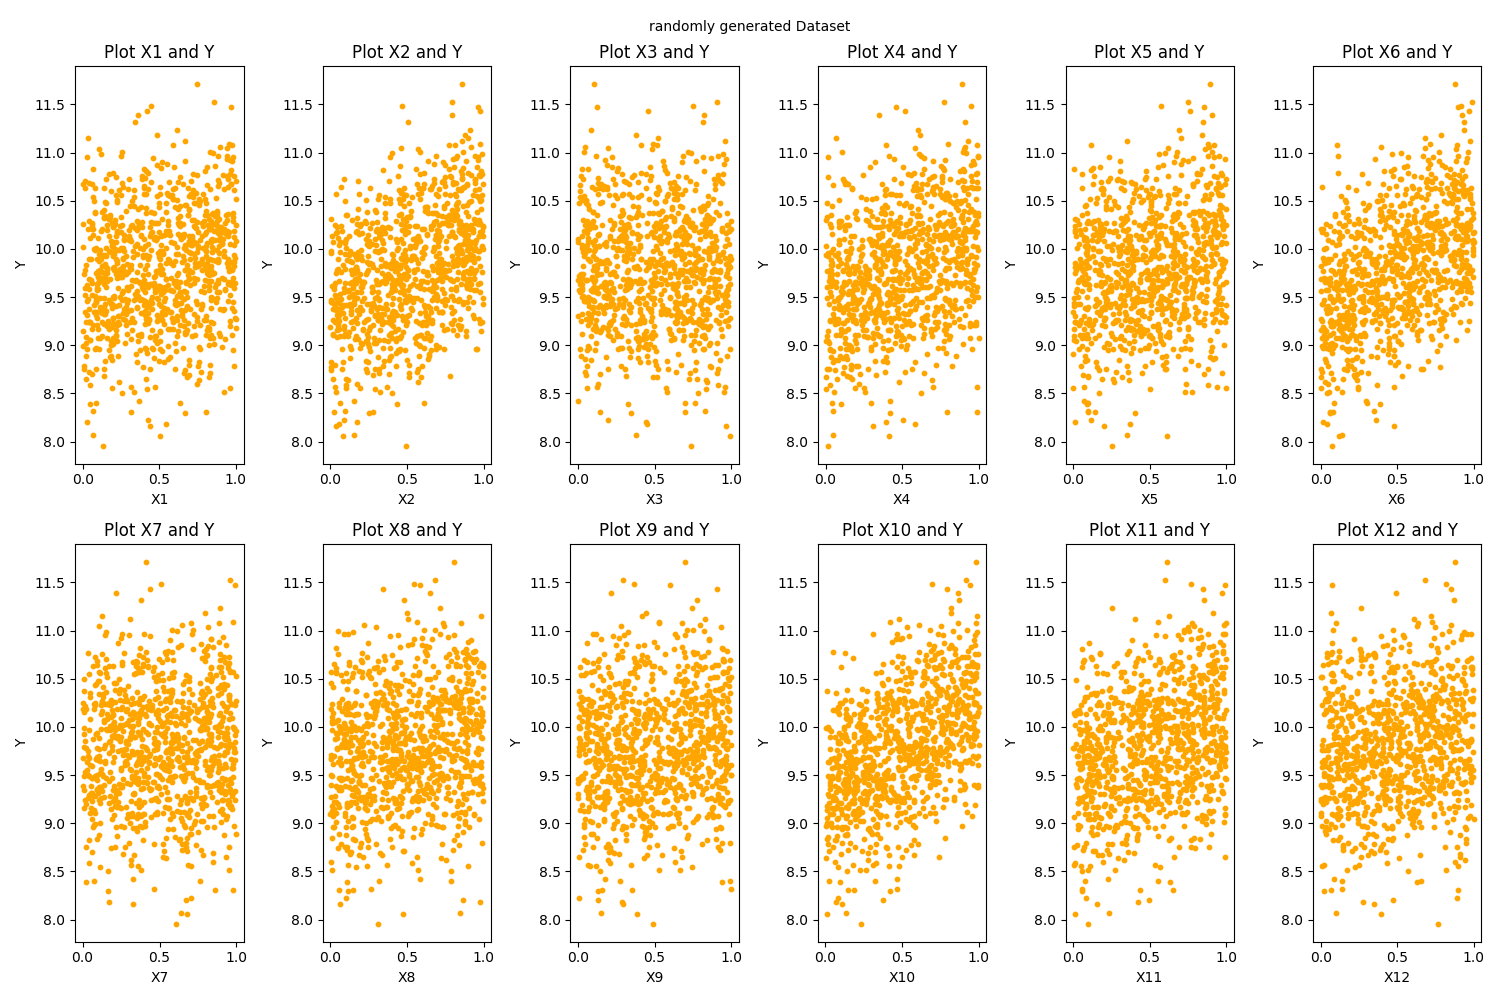

In [5]:

import matplotlib.pyplot as plt
import math

def plot_dataset(X, y, title="randomly generated Dataset"):
    print(f"feaure is :{X.shape[1]}")
    num_features =X.shape[1]
    num_rows = 2
    num_cols = math.ceil(num_features / num_rows)
  
    plt.figure(figsize=(15, 10)) # figsize take two arguments ie fig(width ,heigth)
    for i in range(num_features):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.scatter(X[:, i], y, s=10, color='orange')
        plt.title(f'Plot X{i + 1} and Y')
        plt.suptitle(title, fontsize=10)
        plt.ylabel('Y')
        plt.xlabel(f'X{i+ 1}')
  
    plt.tight_layout()

    plt.show()

plot_dataset(X, y)

In [6]:
# Define a simple linear regression model

def custom_linear_regression(X,weights,bias):
    y_hat = np.dot(X,weights) + bias
    return y_hat



4.Write a function for Standard Scaler.

In [7]:

# Write a function for Standard Scaler.

def standard_scaler(X,num_features):
    x_scaled = X.copy()
    for feature in range(num_features):
        x_scaled[:, feature] = \
         (X[:, feature] - np.mean(X[:, feature]))/np.std(X[:, feature])
    return x_scaled


x_scaled = standard_scaler(X, num_features =12)

5.Write a function for computing loss - use MSE as loss function.

In [8]:
# function to compute mse
def mean_squared_error_loss(y_hat, y):
    return np.sum((y_hat - y)**2)/len(y)

6.Train the model.  

In [9]:
import numpy as np


def train_custom_model(features, target, weights, bias, num_epochs, num_features, learning_rate):
    # Initialize predictions with the initial model weights and bias
    predictions = custom_linear_regression(features, weights, bias)
    
    # Initialize a list to store training losses
    training_losses = []
    
    for epoch in range(num_epochs):
        # Calculate the Mean Squared Error (MSE) loss
        current_loss = mean_squared_error_loss(predictions, target)
        
        # Update the model weights for each feature
        for feature_index in range(num_features):
            # Compute the gradient of the loss with respect to this feature's weight
            weight_gradient = np.sum(np.dot((predictions - target), features[:, feature_index])) / 2
            
            # Update the feature weight using gradient descent
            weights[feature_index] -= learning_rate * weight_gradient / len(target)
        
        # Update the model bias using gradient descent
        bias_gradient = np.sum(predictions - target) / 2
        bias -= learning_rate * bias_gradient / len(target)
        
        # Recalculate predictions with the updated model
        predictions = custom_linear_regression(features, weights, bias)
        
        # Calculate the loss with the updated model and add it to the training loss history
        current_loss = mean_squared_error_loss(predictions, target)
        training_losses.append(current_loss)
        
        # Print the loss for the current epoch
        print("Loss in epoch {}: {}".format(epoch, current_loss))
    
    return weights, bias, training_losses

# Define hyperparameters and initial model conditions
num_features = 12
initial_bias = 2.5
num_epochs = 50
initial_weights = np.zeros(num_features)
learning_rate = 0.2

# Call the training function with the provided data and hyperparameters
trained_weights, trained_bias, losses = train_custom_model(x_scaled, y, initial_weights, initial_bias, num_epochs, num_features, learning_rate)

Loss in epoch 0: 43.34918717647969
Loss in epoch 1: 35.122142808024876
Loss in epoch 2: 28.45808189994044
Loss in epoch 3: 23.06004906066119
Loss in epoch 4: 18.687511667422914
Loss in epoch 5: 15.14563864017829
Loss in epoch 6: 12.276616550396039
Loss in epoch 7: 9.952615887486004
Loss in epoch 8: 8.070093890510016
Loss in epoch 9: 6.5451799514818445
Loss in epoch 10: 5.30993786752888
Loss in epoch 11: 4.309338315669689
Loss in epoch 12: 3.498806589822984
Loss in epoch 13: 2.842236287270548
Loss in epoch 14: 2.310380405038109
Loss in epoch 15: 1.8795481319855412
Loss in epoch 16: 1.5305492501602473
Loss in epoch 17: 1.2478390968904098
Loss in epoch 18: 1.0188259793897674
Loss in epoch 19: 0.8333101749704167
Loss in epoch 20: 0.6830295152010923
Loss in epoch 21: 0.561291303023075
Loss in epoch 22: 0.4626741597583938
Loss in epoch 23: 0.38278651567300803
Loss in epoch 24: 0.31807098224385866
Loss in epoch 25: 0.2656458890683839
Loss in epoch 26: 0.22317692460447375
Loss in epoch 27: 0.1

In [10]:
print(f"lossess is:{losses[1]} , weight is:{trained_weights[1]} ,biases is:{trained_bias}" )

7.Evaluate the model.

In [11]:

# Make predictions on the test set using the trained model
y_predictions = custom_linear_regression(x_scaled, trained_weights, trained_bias)


In [12]:
# Calculate the Mean Squared Error (MSE) between the actual and predicted values
mse_value = mean_squared_error_loss(y, y_predictions)
# Print the MSE with 4 decimal places
print(f"Mean Squared Error: {mse_value:.4f}")